In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [12]:
TIC = 'TIC 312030014'

In [13]:
# search the available data and select data from a couple of sectors 

available_data_select = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

# download the selected data and 'stitch' the data from the different sectors together
lc_collection = available_data_select.download_all().stitch()

<IPython.core.display.Javascript object>


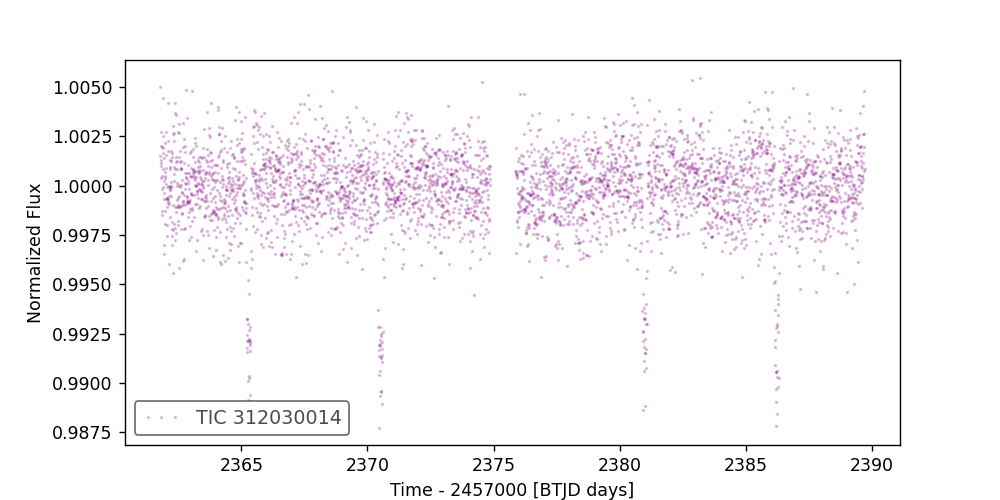

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [14]:
# plot the figure
fig, ax = plt.subplots(figsize = (8,4))

lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)

In [15]:
# for known systems you can look these parameters up on ExoFOP (https://exofop.ipac.caltech.edu/tess/)

period  = 5.233728337283373833 # time between transit events (duration of a year on this planet)
t0 = 2365.2902199741784 # time of one of the transit events 

# NOTE: on ExoFOP the T0 is called 'epoch' and you need to subtract 2457000 from the value to get it into the right units!

In [16]:
# use the lightkurve function .fold to phase fold the data (make sure to give it the period and t0)
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

<IPython.core.display.Javascript object>


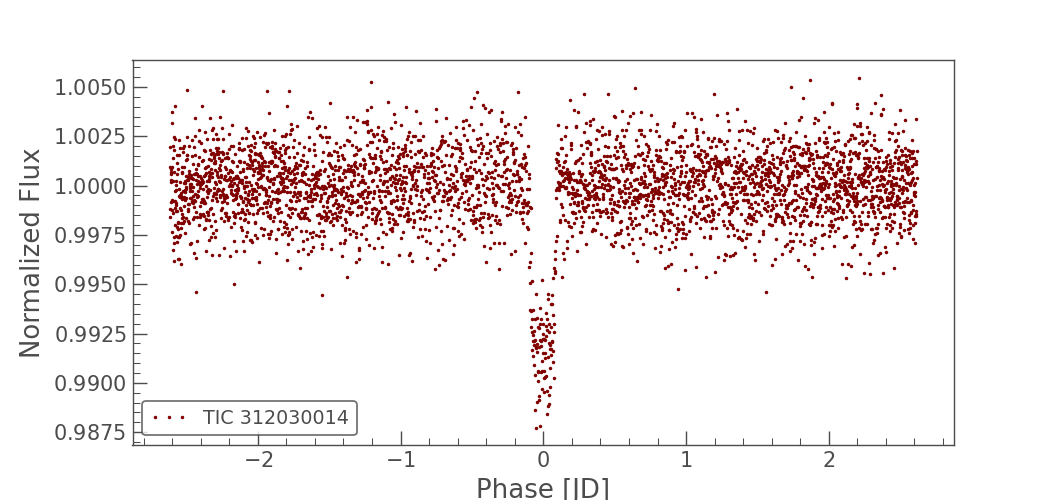

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

In [17]:
# plot the phase folded data (the transit event is at phase = 0 so try zooming in on it to see it better)
lc_phased.plot(linewidth =0, color = 'maroon', marker = '.')

In [18]:
# we can bin the phase folded data to make the transit more obvious (watch the episode on binning for more information on this)
lc_phased_binned = lc_phased.bin(15/24/60)

<IPython.core.display.Javascript object>


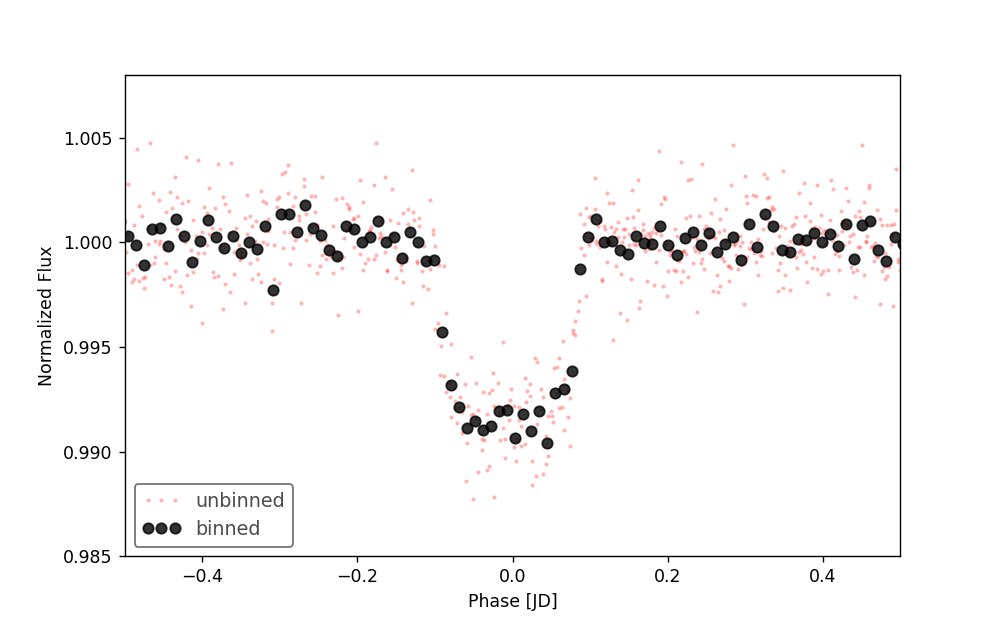

(0.985, 1.008)

In [19]:
# plot both the binned and unbinned data on the same figure

#define a plotting region
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (for different targets these limits will be different!)
plt.xlim(-0.5,0.5)
plt.ylim(0.985, 1.008)

<IPython.core.display.Javascript object>


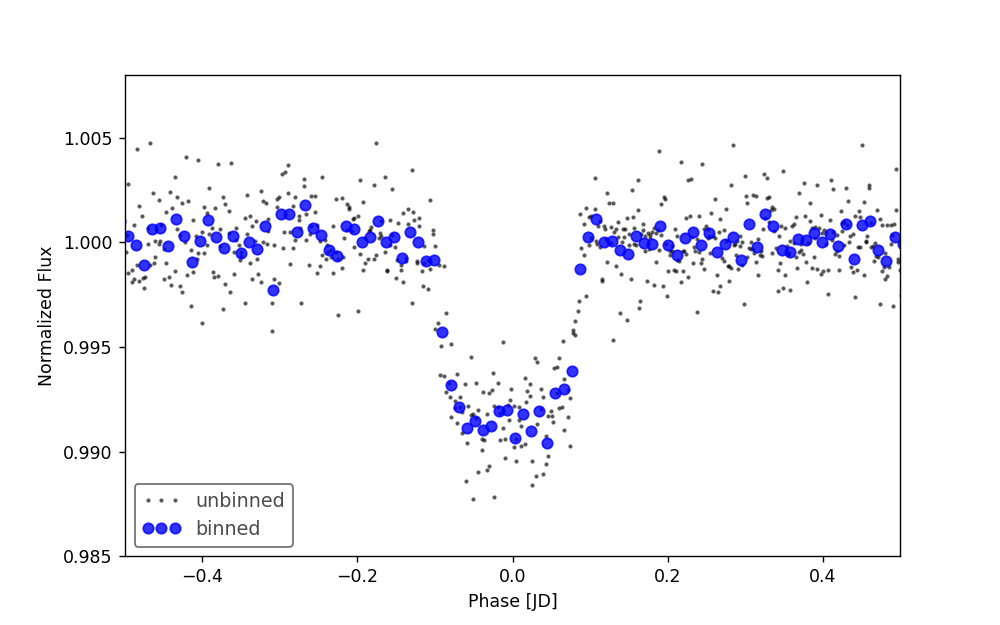

(0.985, 1.008)

In [20]:
# lets try this for a different target - I have added an '_2' to everything to seperate it from the previous example
# we'll do it in one cell but doing it in mutliple cells works just as well! 

# define a TIC ID
TIC = 'TIC 312030014'

# search what SPOC data for this target for sector 23 (for other targets first check what sectors are available)
sector_data_2 = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

# normalize the data
lc_2 = sector_data_2.download().normalize() #as we're only lookign at one sector we'll use the .normalize() function instead of the .stitch function

# define the pre-determined period and t0
period_2 = 5.233728337283373833
t0_2 = 2459365.290220 - 2457000 # this value is from ExoFOP so subtract 2457000 to get it in to the right units

# phase fold
lc_phased_2 = lc_2.fold(period = period_2, epoch_time = t0_2)

# bin the phase folded lightcurve
lc_phased_binned_2 = lc_phased_2.bin(15/24/60)


# --- plot the data ---

fig, ax = plt.subplots(figsize = (8,5))

lc_phased_2.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 0.5, markersize = 3, label = 'unbinned')
lc_phased_binned_2.plot(ax = ax, marker = 'o', linewidth = 0, color = 'blue', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (note that the limits need to be different from the previous example)
plt.xlim(-0.5,0.5)
plt.ylim(0.985, 1.008)

In [ ]:
lk.show_citation_instructions()